In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Coding/courses/jl-probabilities`


In [2]:
using Turing
using MCMCChains
using Random

using StatsPlots

In [3]:
x = [0., 2, 3, 4]

4-element Vector{Float64}:
 0.0
 2.0
 3.0
 4.0

In [4]:
k0 = 1.5
b0 = -1.0
σ = 0.2

0.2

In [5]:
y_observed = k0.*x .+ b0 .+ σ.*randn(size(x))

4-element Vector{Float64}:
 -0.7646703497307299
  2.089545572417883
  3.413647400113901
  5.016832482590686

In [6]:
@model function linear_model(x, y, σ)
	k ~ Flat()
	b ~ Flat()
	for i ∈ eachindex(x)
		y[i] ~ Normal(k * x[i] + b, σ)
	end;
end

linear_model (generic function with 2 methods)

In [7]:
m = linear_model(x, y_observed, σ)

DynamicPPL.Model{typeof(linear_model), (:x, :y, :σ), (), (), Tuple{Vector{Float64}, Vector{Float64}, Float64}, Tuple{}, DynamicPPL.DefaultContext}(linear_model, (x = [0.0, 2.0, 3.0, 4.0], y = [-0.7646703497307299, 2.089545572417883, 3.413647400113901, 5.016832482590686], σ = 0.2), NamedTuple(), DynamicPPL.DefaultContext())

In [8]:
samples = sample(m, NUTS(), 1000)

Sampling   0%|                                          |  ETA: N/A


┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /Users/vasiliy/.julia/packages/Turing/b6CoW/src/inference/hmc.jl:190
Sampling   0%|▎                                         |  ETA: 0:16:46


Sampling   1%|▍                                         |  ETA: 0:08:22
Sampling   1%|▋                                         |  ETA: 0:05:33
Sampling   2%|▊                                         |  ETA: 0:04:09
Sampling   2%|█                                         |  ETA: 0:03:18
Sampling   3%|█▏                                        |  ETA: 0:02:44
Sampling   3%|█▍                                        |  ETA: 0:02:20
Sampling   4%|█▋                                        |  ETA: 0:02:02
Sampling   4%|█▊                                        |  ETA: 0:01:48
Sampling   5%|██                                        |  ETA: 0:01:37
Sampling   5%|██▏                                       |  ETA: 0:01:27
Sampling   6%|██▍                                       |  ETA: 0:01:20
Sampling   6%|██▌                                       |  ETA: 0:01:13
Sampling   7%|██▊                                       |  ETA: 0:01:08
Sampling   7%|███                                       |  ETA:


Sampling  48%|████████████████████                      |  ETA: 0:00:05
Sampling  48%|████████████████████▎                     |  ETA: 0:00:05
Sampling  49%|████████████████████▍                     |  ETA: 0:00:05
Sampling  49%|████████████████████▋                     |  ETA: 0:00:05
Sampling  49%|████████████████████▊                     |  ETA: 0:00:05
Sampling  50%|█████████████████████                     |  ETA: 0:00:05
Sampling  50%|█████████████████████▏                    |  ETA: 0:00:05
Sampling  51%|█████████████████████▍                    |  ETA: 0:00:05
Sampling  51%|█████████████████████▌                    |  ETA: 0:00:05
Sampling  52%|█████████████████████▊                    |  ETA: 0:00:04
Sampling  52%|██████████████████████                    |  ETA: 0:00:04
Sampling  53%|██████████████████████▏                   |  ETA: 0:00:04
Sampling  53%|██████████████████████▍                   |  ETA: 0:00:04
Sampling  54%|██████████████████████▌                   |  ETA:


Sampling  83%|██████████████████████████████████▊       |  ETA: 0:00:01
Sampling  83%|██████████████████████████████████▉       |  ETA: 0:00:01
Sampling  84%|███████████████████████████████████▏      |  ETA: 0:00:01
Sampling  84%|███████████████████████████████████▎      |  ETA: 0:00:01
Sampling  84%|███████████████████████████████████▌      |  ETA: 0:00:01
Sampling  85%|███████████████████████████████████▋      |  ETA: 0:00:01
Sampling  85%|███████████████████████████████████▉      |  ETA: 0:00:01
Sampling  86%|████████████████████████████████████▏     |  ETA: 0:00:01
Sampling  86%|████████████████████████████████████▎     |  ETA: 0:00:01
Sampling  87%|████████████████████████████████████▌     |  ETA: 0:00:01
Sampling  87%|████████████████████████████████████▋     |  ETA: 0:00:01
Sampling  88%|████████████████████████████████████▉     |  ETA: 0:00:01
Sampling  88%|█████████████████████████████████████     |  ETA: 0:00:01
Sampling  89%|█████████████████████████████████████▎    |  ETA:

Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 5.65 seconds
Compute duration  = 5.65 seconds
parameters        = k, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

           k    1.4334    0.0609     0.0019    0.0030   296.8159    0.9992     ⋯
           b   -0.7869    0.1649     0.0052    0.0078   290.1576    0.9991     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           

Следующий график показывает, что при больших `k` должно быть более отрицательное `b:`

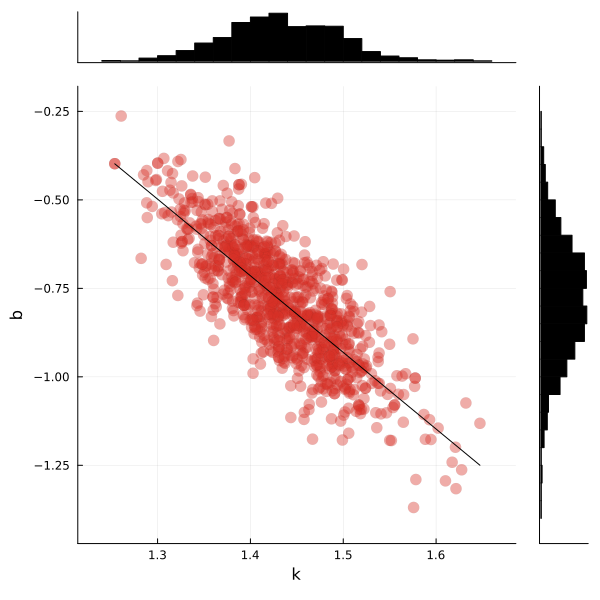

In [9]:
corner(samples)

In [11]:
me = mean(samples)

Mean
  parameters      mean 
      Symbol   Float64 

           k    1.4334
           b   -0.7869


In [12]:
k_est, b_est = me.nt.mean

2-element Vector{Float64}:
  1.4334334989069217
 -0.7869002766208898

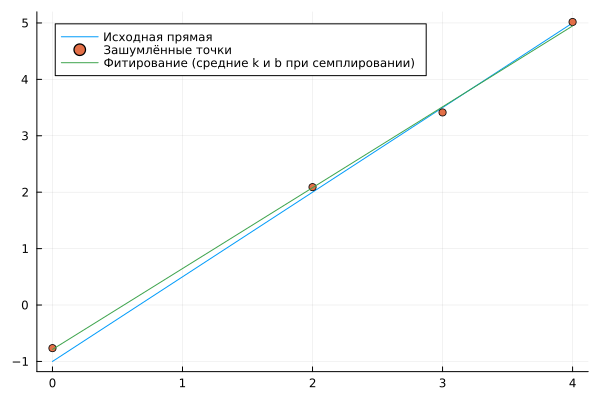

In [16]:
plot(x, k0 .* x .+ b0, label = "Исходная прямая")
plot!(x, y_observed, seriestype = :scatter, label = "Зашумлённые точки")
plot!(x, k_est .* x .+ b_est, label = "Фитирование (средние k и b при семплировании)")
plot!(legend = :topleft)